# Miscellaneous code snippets useful for data visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
%matplotlib inline

## Function to produce n-length list of RGBa colors

Useful references:
  - http://matplotlib.org/examples/color/colormaps_reference.html

In [2]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

Demonstrate the function

In [3]:
get_colors('spectral', n=5, start=0.1, stop=0.9, alpha=0.6)

[(0.53068823529411768, 0.0, 0.59738431372549017, 0.6),
 (0.0, 0.59477254901960785, 0.86670000000000003, 0.6),
 (0.0, 0.73853137254901957, 0.0, 0.6),
 (0.93591568627450983, 0.9280725490196079, 0.0, 0.6),
 (0.86408431372549022, 0.0, 0.0, 0.6)]

## Plot any color list to get a sense of how it will look

Resources on color theory:
  - http://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
  - http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833
  - http://matplotlib.org/users/colormaps.html
  - http://medvis.org/2016/02/23/better-than-the-rainbow-the-matplotlib-alternative-colormaps/
  - http://www.scribblelive.com/blog/2013/06/25/building-effective-color-scales/
  - https://betterfigures.org/2015/06/23/picking-a-colour-scale-for-scientific-graphics/
  - https://eagereyes.org/basics/rainbow-color-map
  - http://www.climate-lab-book.ac.uk/2016/why-rainbow-colour-scales-can-be-misleading/

In [4]:
def plot_test(color_list, lw=2):
    ax, fig = plt.subplots(figsize=[10, 6])
    for n, c in zip(range(len(color_list)), color_list):
        ax = plt.plot([0, 1], [0, n+1], color=c, linewidth=lw)

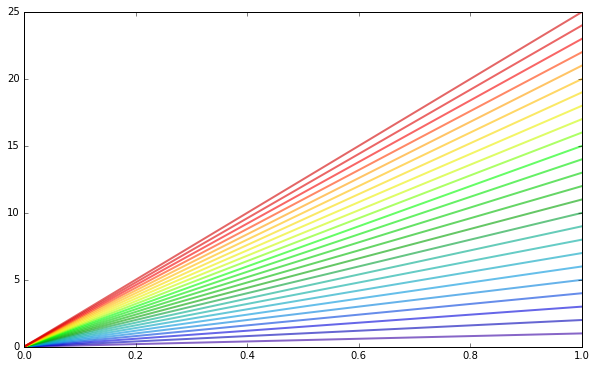

In [5]:
color_list = get_colors('spectral', n=25, start=0.13, stop=0.93, alpha=0.6)
plot_test(color_list)

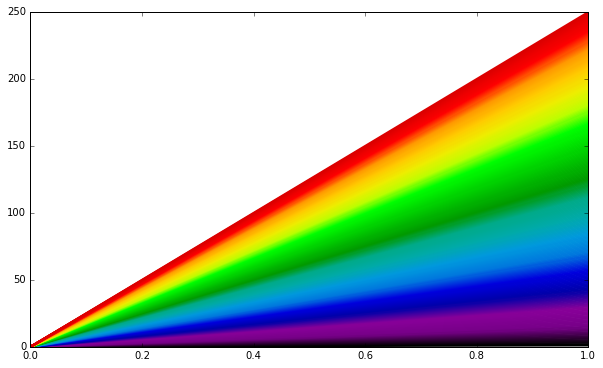

In [6]:
color_list = get_colors('spectral', n=250, stop=0.9)
plot_test(color_list)

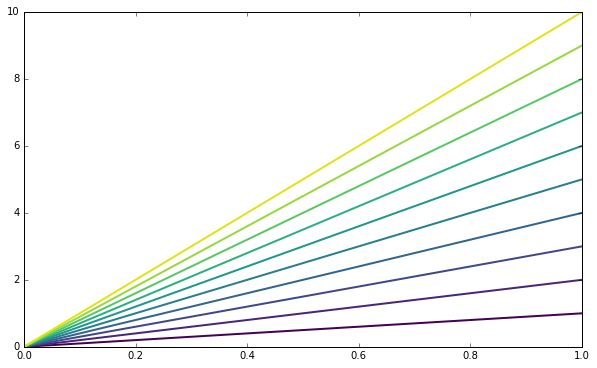

In [7]:
color_list = get_colors('viridis', n=10, stop=0.95, reverse=False)
plot_test(color_list)

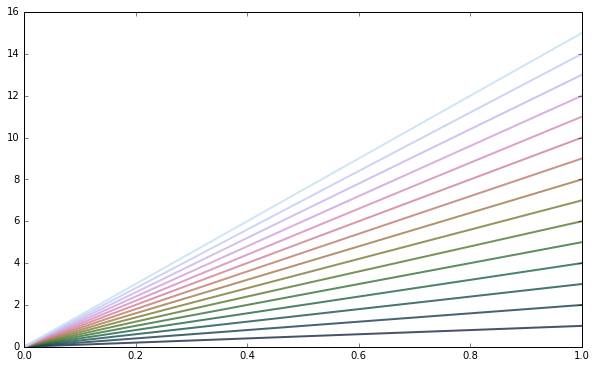

In [8]:
color_list = get_colors('cubehelix', n=15, start=0.15, stop=0.85, alpha=0.8, reverse=False)
plot_test(color_list)

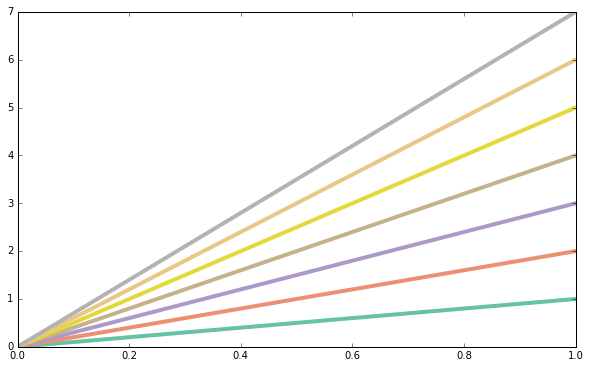

In [9]:
color_list = get_colors('Set2', n=7)
plot_test(color_list, lw=4)

## How do the color palettes look if reduced to grayscale (such as for printing)?

The following is adapted from https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

In [10]:
def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

In [11]:
def show_colormap(cmap):
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))

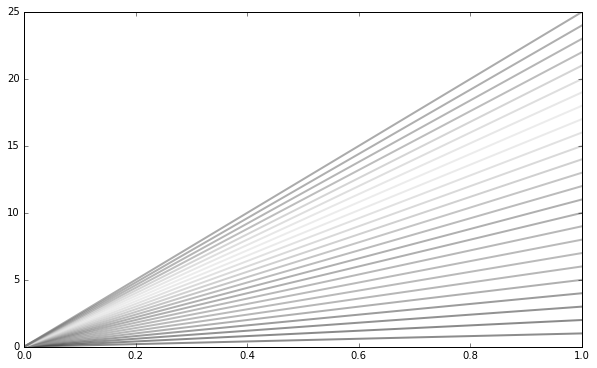

In [12]:
color_list = get_colors(grayify_cmap('spectral'), n=25, start=0.13, stop=0.93, alpha=0.6)
plot_test(color_list)

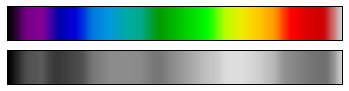

In [13]:
show_colormap('spectral')

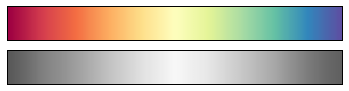

In [14]:
show_colormap('Spectral')

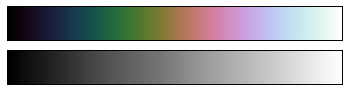

In [15]:
show_colormap('cubehelix')

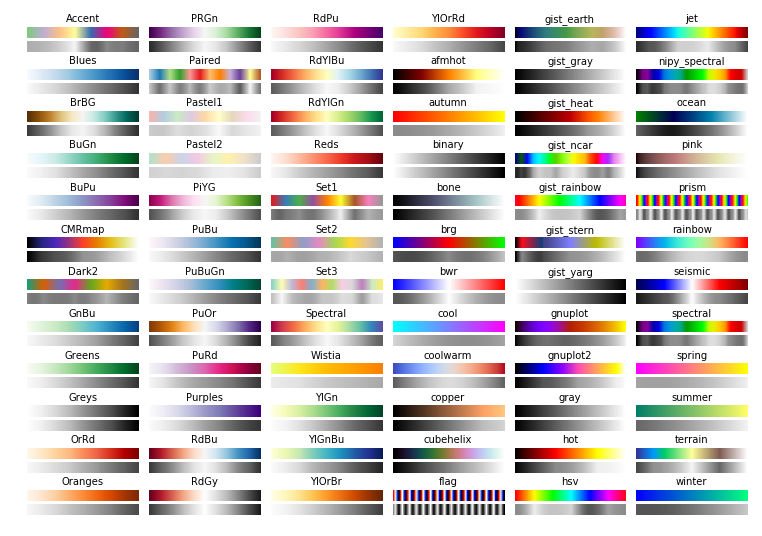

In [16]:
fig, axes = plt.subplots(36, 6, figsize=(10, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

im = np.outer(np.ones(10), np.arange(100))

cmaps = [m for m in plt.cm.datad if not m.endswith('_r')]
cmaps.sort()

axes = axes.T.ravel()
for ax in axes:
    ax.axis('off')

for cmap, color_ax, gray_ax, null_ax in zip(cmaps, axes[1::3], axes[2::3], axes[::3]):
    del null_ax
    color_ax.set_title(cmap, fontsize=10)
    color_ax.imshow(im, cmap=cmap)
    gray_ax.imshow(im, cmap=grayify_cmap(cmap))

## Available fonts

In [17]:
fonts = fm.findSystemFonts(fontpaths=None)
fonts = sorted([font[font.rfind('\\') + 1:font.rfind('.')].lower() for font in fonts])
print(len(fonts))
for font in fonts:
    print(font)

820
acaslonpro-bold
acaslonpro-bold
acaslonpro-bolditalic
acaslonpro-bolditalic
acaslonpro-italic
acaslonpro-italic
acaslonpro-regular
acaslonpro-regular
acaslonpro-semibold
acaslonpro-semibold
acaslonpro-semibolditalic
acaslonpro-semibolditalic
adobearabic-bold
adobearabic-bold
adobearabic-bolditalic
adobearabic-bolditalic
adobearabic-italic
adobearabic-italic
adobearabic-regular
adobearabic-regular
adobedevanagari-bold
adobedevanagari-bold
adobedevanagari-bolditalic
adobedevanagari-bolditalic
adobedevanagari-italic
adobedevanagari-italic
adobedevanagari-regular
adobedevanagari-regular
adobefangsongstd-regular
adobefangsongstd-regular
adobefanheitistd-bold
adobefanheitistd-bold
adobegothicstd-bold
adobegothicstd-bold
adobehebrew-bold
adobehebrew-bold
adobehebrew-bolditalic
adobehebrew-bolditalic
adobehebrew-italic
adobehebrew-italic
adobehebrew-regular
adobehebrew-regular
adobeheitistd-regular
adobeheitistd-regular
adobekaitistd-regular
adobekaitistd-regular
adobemingstd-light
adobemi